## Read SEG-Y with `obspy`

Before going any further, you might like to know, [What is SEG-Y?](http://www.agilegeoscience.com/blog/2014/3/26/what-is-seg-y.html). See also the articles in [SubSurfWiki](http://www.subsurfwiki.org/wiki/SEG_Y) and [Wikipedia](https://en.wikipedia.org/wiki/SEG_Y).

We'll use the [obspy](https://github.com/obspy/obspy) seismology library to read and write SEGY data.
    
Technical SEG-Y documentation:

* [SEG-Y Rev 1](http://seg.org/Portals/0/SEG/News%20and%20Resources/Technical%20Standards/seg_y_rev1.pdf)
* [SEG-Y Rev 2 proposal](https://www.dropbox.com/s/txrqsfuwo59fjea/SEG-Y%20Rev%202.0%20Draft%20August%202015.pdf?dl=0) and [draft repo](http://community.seg.org/web/technical-standards-committee/documents/-/document_library/view/6062543)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2D data

In [2]:
filename = '/home/matt/Downloads/L020.sgy2'

In [3]:
from obspy.io.segy.segy import _read_segy
stream = _read_segy(filename, headonly=True)

# OPTIONS
# headonly=True — only reads the header info, then you can index in on-the-fly.
# unpack_headers=True — slows you down here and isn't really required.

In [4]:
data = np.vstack([t.data for t in stream.traces])

In [14]:
data.shape

(16857, 4000)

Plot every 4th trace of the first 4000 traces

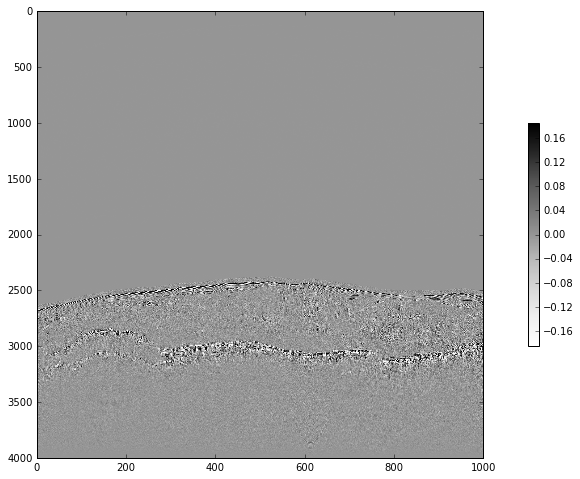

In [38]:
vm = np.percentile(data, 99)

plt.figure(figsize=(16,8))
plt.imshow(data[:4000:4].T, cmap="Greys", vmin=-vm, vmax=vm, aspect=0.25)
plt.colorbar(shrink=0.5)
plt.show()

In [7]:
stream.traces[0]

Trace sequence number within line: 0
4000 samples, dtype=float32, 500.00 Hz

We need a helper function to read the file header nicely:

In [34]:
def chunk(string, width=80):
    try:
        # Make sure we don't have a ``bytes`` object.
        string = string.decode()
    except:
        # String is already a string, carry on.
        pass
    lines = int(np.ceil(len(string) / width))
    result = ''
    for i in range(lines):
        line = string[i*width:i*width+width]
        result += line + (width-len(line))*' ' + '\n'
    return result

s = stream.textual_file_header.decode()
print(chunk(s))

c  1                                                                            
c  2  Tape 584 Cruise  72  July 1984                                            
c  3                                                                            
c  4                                                                            
c  5                                                                            
c  6                                                                            
c  7                                                                            
c  8                                                                            
c  9                                                                            
c 10                                                                            
c 11                                                                            
c 12                                                                            
c 13                        

In [35]:
stream.binary_file_header

Binary File Header:
	job_identification_number: 0
	line_number: 0
	reel_number: 0
	number_of_data_traces_per_ensemble: 48
	number_of_auxiliary_traces_per_ensemble: 0
	sample_interval_in_microseconds: 2000
	sample_interval_in_microseconds_of_original_field_recording: 0
	number_of_samples_per_data_trace: 4000
	number_of_samples_per_data_trace_for_original_field_recording: 0
	data_sample_format_code: 5
	ensemble_fold: 0
	trace_sorting_code: 0
	vertical_sum_code: 0
	sweep_frequency_at_start: 0
	sweep_frequency_at_end: 0
	sweep_length: 0
	sweep_type_code: 0
	trace_number_of_sweep_channel: 0
	sweep_trace_taper_length_in_ms_at_start: 0
	sweep_trace_taper_length_in_ms_at_end: 0
	taper_type: 0
	correlated_data_traces: 0
	binary_gain_recovered: 0
	amplitude_recovery_method: 0
	measurement_system: 0
	impulse_signal_polarity: 0
	vibratory_polarity_code: 0
	unassigned_1: b'\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

## Look at traces

In [11]:
t = stream.traces[0]

t.npts

4000

In [12]:
t.header

trace_sequence_number_within_line: 0
trace_sequence_number_within_segy_file: 1
original_field_record_number: 3974
trace_number_within_the_original_field_record: 2
energy_source_point_number: 3985
ensemble_number: 7921
trace_number_within_the_ensemble: 1
trace_identification_code: 1
number_of_vertically_summed_traces_yielding_this_trace: 0
number_of_horizontally_stacked_traces_yielding_this_trace: 23
data_use: 0
distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group: -59
receiver_group_elevation: 0
surface_elevation_at_source: 0
source_depth_below_surface: 0
datum_elevation_at_receiver_group: 0
datum_elevation_at_source: 0
water_depth_at_source: 0
water_depth_at_group: 0
scalar_to_be_applied_to_all_elevations_and_depths: 0
scalar_to_be_applied_to_all_coordinates: 0
source_coordinate_x: 510665
source_coordinate_y: 4483165
group_coordinate_x: 0
group_coordinate_y: 0
coordinate_units: 0
weathering_velocity: 0
subweathering_velocity: 0
uphole_time_at_source_in_ms: 0
up

Check what various fields look like:

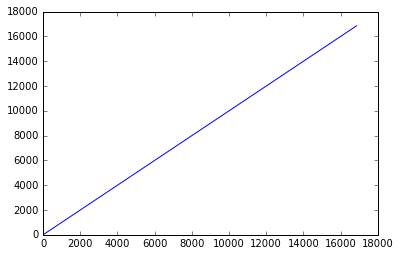

In [37]:
plt.plot([t.header.trace_sequence_number_within_segy_file for t in stream.traces])

## Write data

In [40]:
from obspy.core import AttribDict
from obspy.core import Trace, Stream
from obspy.io.segy.segy import SEGYBinaryFileHeader
from obspy.io.segy.segy import SEGYTraceHeader

### Change header only

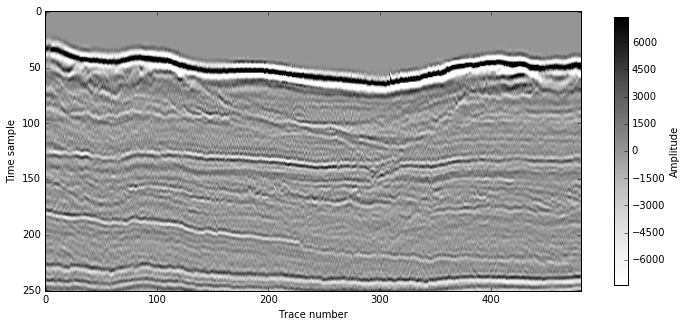

In [18]:
# Assuming the stream already exists and you just want to change the header.
# The header can be up to 40 lines of 80 characters. 


# Keep first 320 character of existing header
stream.stats.textual_file_header = stream.stats.tectual_file_header[:320]

# Now add to it.
stream.stats.textual_file_header += b'This is some more text header. This file contains seismic data.'
stream.stats.textual_file_header += b'This adds more text header.'

In [16]:
stream.write('out.sgy', format='SEGY', data_encoding=5)  # encode 1 for IBM, 5 for IEEE

### Changing trace data

Only need to do this if you're changing the trace data.

In [15]:
stream = obspy.Stream()  # Starts a new stream

for i, trace in enumerate(data):
    
    # Make the trace.
    tr = obspy.Trace(trace)
    
    # Add required data.
    tr.stats.delta = 0.004
    # tr.stats.starttime = 0  # Not strictly required.

    # Add yet more to the header (optional).
    tr.stats.segy = {'trace_header': SEGYTraceHeader()}
    tr.stats.segy.trace_header.trace_sequence_number_within_line = i + 1
    # tr.stats.segy.trace_header.receiver_group_elevation = 0
    
    # Append the trace to the stream.
    stream.append(tr)

In [16]:
stream.write('out.sgy', format='SEGY', data_encoding=5)  # encode 1 for IBM, 5 for IEEE

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2016</p>
</div>